In [125]:
# standard data imports
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#pulling sample dataset
from pydataset import data

#new library for stats
from scipy import stats

 Use the following contingency table to help answer the question of whether using a Macbook and being a 
 Codeup student are independent of each other.
 Codeup Student	Not Codeup Student
 Uses a Macbook	49	20
 Doesn't Use A Macbook	1	30

In [126]:
# create table columns with dict
data_dict = {'Codeup Student': [49,1], 'Not a Codeup Student':[20,30]}
data_dict

{'Codeup Student': [49, 1], 'Not a Codeup Student': [20, 30]}

In [127]:
# convert dict to df by indexing rows
observed = pd.DataFrame(data_dict, index=['Uses a Macbook','Doesn\'t Use A Macbook'])
observed

,Codeup Student,Not a Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


null hyp: there is no relationship btwen codeup student and macbook user
hyp: there is a relationship btwn the two

In [128]:
alpha = .05

In [129]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [130]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [131]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [132]:
observed.values

array([[49, 20],
       [ 1, 30]])

In [133]:
chi2, dof

(36.65264142122487, 1)

In [134]:
p


1.4116760526193828e-09

 p < null = reject null

In [135]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [136]:
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

Q: Does the class of the car affect how many cylinders it has?

$H0$: Car class is independent of number of cylinders.

$H1$: Car class is dependent of number of cylinders.

alpha = 0.05



In [137]:
df.cyl.value_counts()

cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

In [138]:
df['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [139]:
# reminder 
# pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
observed = pd.crosstab(df.cyl, df['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [140]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [141]:
chi2, dof

(138.02824375973248, 18)

In [142]:
p

1.5351076620141522e-20

 reject null P < alpha
 car class is dependent of cyl

 use employees database
Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [150]:
# Pull the tables from the database
url= get_db_url(env.user, env.host, env.password, 'employees')

query = '''
SELECT * FROM employees
JOIN dept_emp
    USING(emp_no)
JOIN departments
    USING(dept_no)
'''

employees = pd.read_sql(query,url)

In [151]:
pd.read_sql('show tables', url)


,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [152]:
query = '''
select *
from employees as e
	join dept_emp as de
		using (emp_no)
	join departments as d
		using (dept_no)
where to_date > now()
	and dept_name in ('sales','marketing')
'''

In [153]:
 emp_df=pd.read_sql(query, url)

In [154]:
emp_df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


$H_o$ There is no relationship between gender and whether or not an employees works in sales or marketing

$H_a$ There is relationship between gender and whether or not an employees works in sales or marketing

alpha = .05

Is an employee's gender independent of whether an employee works in sales or marketing? 
(only look at current employees)


In [155]:
emp_df.gender.value_counts()

gender
M    31680
F    20863
Name: count, dtype: int64

In [156]:
emp_df.dept_name.value_counts()

dept_name
Sales        37701
Marketing    14842
Name: count, dtype: int64

In [157]:
observed = pd.crosstab(emp_df.gender,emp_df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [158]:
chi2, p, dof, expected = stats.chi2_contingency(observed)


In [159]:
chi2, dof

(0.3240332004060638, 1)

In [160]:
p

0.5691938610810126

In [174]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    print('outcome is there is no relationship between gender & S&M')

We fail to reject the null hypothesis
outcome is there is no relationship between gender & S&M


Is an employee's gender independent of whether or not they are or have been a manager?

In [175]:
query = '''select *
from dept_manager
	right join employees
		using (emp_no)'''

In [176]:
dm_df = pd.read_sql(query, url)

In [177]:
dm_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [178]:
dm_df.gender.value_counts()

gender
M    179973
F    120051
Name: count, dtype: int64

In [179]:
dm_df.to_date.value_counts(dropna=False)

to_date
None          300000
9999-01-01         9
1989-05-06         1
1992-09-08         1
1988-10-17         1
1991-04-08         1
1991-03-07         1
1994-06-28         1
1991-09-12         1
1992-04-25         1
1991-10-01         1
1996-08-30         1
1992-08-02         1
1988-09-09         1
1992-03-21         1
1989-12-17         1
1996-01-03         1
Name: count, dtype: int64

In [180]:
dm_df['is_manager'] = dm_df.to_date.notnull()

In [181]:
dm_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None,False


In [183]:
dm_df.is_manager.value_counts()

is_manager
False    300000
True         24
Name: count, dtype: int64

$H_o$: there is no relationship

$H_a$: there is a relationship



In [184]:
α=.05

In [186]:
observed = pd.crosstab(dm_df.is_manager, dm_df.gender)
observed

gender,F,M
is_manager,,
False,120038,179962
True,13,11


In [187]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [188]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


 Is there a relationship between the length of your arm and the length of your foot?

Lengths of arms and feet are continuous variables, so correlation test

Does smoking affect when or not someone has lung cancer?

Smoking is a categorical variable. Having lung cancer is also a categorical variable. Therefore, it is a 
proportion test.

s gender independent of a person’s blood type?

Gender is a categorical variable. A person's blood type is also categorical. Therefore, it is a proportion test.m

Does whether or not a person has a cat or dog affect whether they live in an apartment?

A person owning a cat/dog is categorical, same as living in an apartment. Therefore, this is a proportion test.

Does the length of time of the lecture correlate with a student's grade?

Length of the lecture is continuous. Assuming the student's grade is measured by a numerical index and not an 
alphabetical index, then the student's grade is a continuous variable, and so it is a correlation test.

Use the telco_churn data.

In [190]:
url= get_db_url(env.user, env.host, env.password, 'telco_churn')
pd.read_sql('show tables',url)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


In [50]:
# Does tenure correlate with monthly charges?

In [191]:
alpha = .05


$H_o$ there is no linear relationship between montly charges and tenure

$H_a$: there is a linear relationship between monthly charges and tenure

In [198]:
cust_df = pd.read_sql('select * from customers',url)
cust_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


<Axes: xlabel='tenure', ylabel='monthly_charges'>

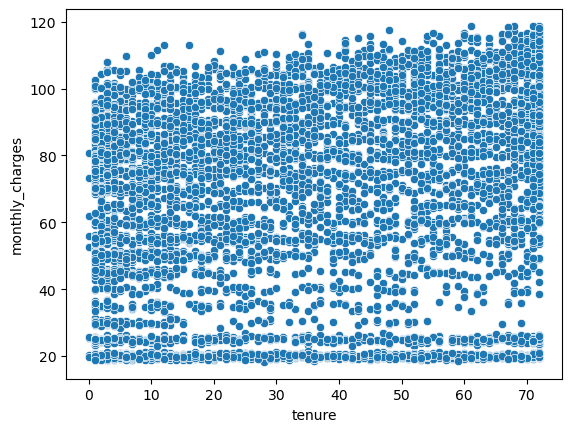

In [199]:
sns.scatterplot(data=cust_df, y='monthly_charges', x='tenure')

In [201]:
r, p = stats.pearsonr(cust_df.monthly_charges, cust_df.tenure)

In [202]:
r

0.24789985628615246

In [203]:
p

4.094044991476844e-99

In [56]:
# reject null there is a relationship but it is weak

Total charges?

In [58]:
# cust_df.total_charges.astype(float)

In [204]:
# could strip out space
# df.total_charges.str.strip().value_counts().index
# could drop data due to only 11 rows
cust_df = cust_df [cust_df.total_charges != ' ']

In [205]:
# view data of the 11 rows with unaligned data to understand it better
cust_df [cust_df.total_charges == ' ']
# reveals they are probably new customers and can replace ' ' with 0 and then convert to float

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn


In [208]:
# Found errors in plotting, so need to fix them
cust_df.total_charges = pd.to_numeric(cust_df.total_charges,errors='coerce')

# Drop nulls, nas, etc.
# customers.total_charges = customers.total_charges.dropna()
cust_df = cust_df.dropna()

<Axes: xlabel='tenure', ylabel='total_charges'>

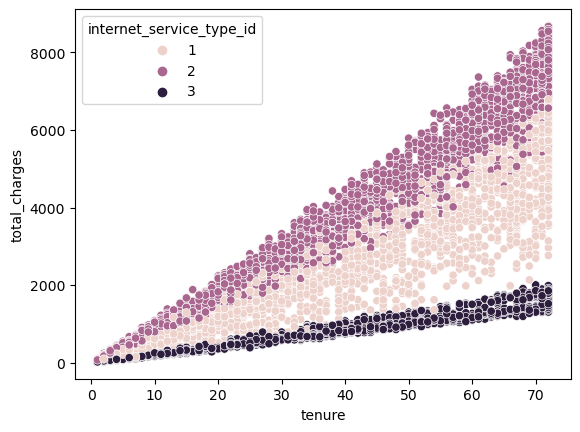

In [227]:
sns.scatterplot(data=cust_df, x='tenure', y='total_charges', hue='internet_service_type_id')

In [222]:
r,p = stats.pearsonr(cust_df.tenure, cust_df.total_charges)
r, p

(0.8258804609332071, 0.0)

In [225]:
if p<alpha:
    print('reject null')
    print('alternative hypothesis is that there is a linear relationship btwn tenure and total charges')
else:
    print('accept null')
    print('there is not a linear relationship btwn tenure and total charges')

reject null
alternative hypothesis is that there is a linear relationship btwn tenure and total charges


In [223]:
# What happens if you control for phone and internet service?

In [224]:
cust_df.phone_service.value_counts()

phone_service
Yes    6352
No      680
Name: count, dtype: int64

In [219]:

cust_df.internet_service_type_id.value_counts()

internet_service_type_id
2    3096
1    2416
3    1520
Name: count, dtype: int64

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


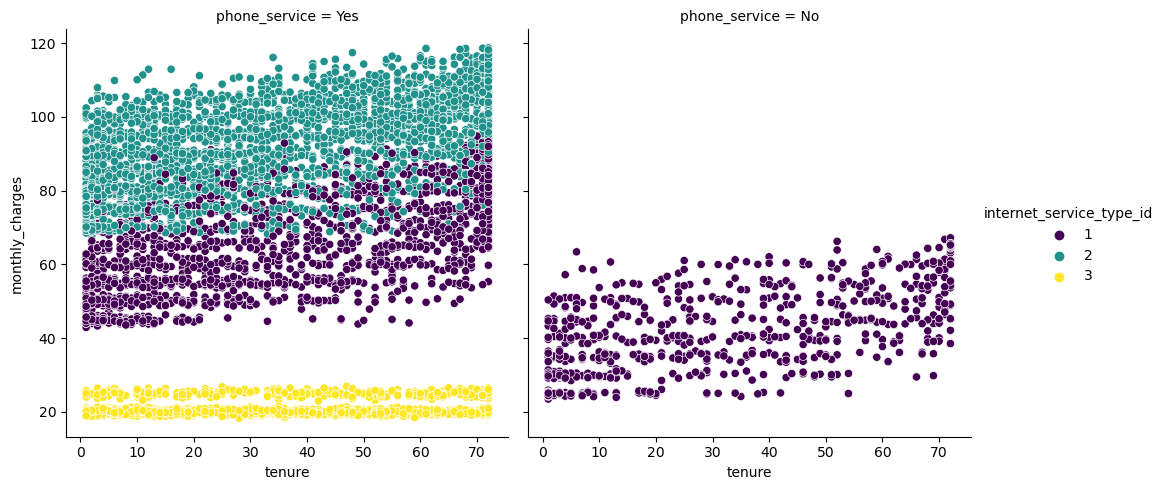

In [230]:
sns.relplot(data=cust_df, y='monthly_charges', x='tenure', 
                col='phone_service', hue='internet_service_type_id', palette='viridis')

In [233]:
def run_pearsonr(df):
    r,p = stats.pearsonr(cust_df.monthly_charges, cust_df.tenure)
    return pd.Series((r,p))

In [234]:
cust_df.groupby(['phone_service','internet_service_type_id']).apply(run_pearsonr)


0             1
phone_service internet_service_type_id                        
No            1                         0.246862  3.989821e-98
Yes           1                         0.246862  3.989821e-98
              2                         0.246862  3.989821e-98
              3                         0.246862  3.989821e-98

In [67]:
# to find out what 1 2 3 mean join internet table 

In [ ]:
# query= '''

# '''

Use emp database

In [235]:
url= get_db_url(env.user, env.host, env.password, 'employees')
pd.read_sql('show tables',url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [236]:
emp2_df = pd.read_sql('select * from employees', get_db_url(env.user, env.host, env.password, 'employees'))
emp2_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


Is there a relationship between how long an employee has been with the company and their salary?

In [237]:
sal_df = pd.read_sql('''select * from salaries
	join employees using (emp_no)
    where to_date > now();''', url)
sal_df.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [239]:
sal_df.shape
# sal_df.info

(240124, 9)

In [241]:
sal_df['tenure_days'] = sal_df.to_date - sal_df.hire_date

In [242]:
sal_df.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,tenure_days
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,"2926512 days, 0:00:00"
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,"2926729 days, 0:00:00"
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,"2926449 days, 0:00:00"
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,"2926354 days, 0:00:00"
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,"2925338 days, 0:00:00"


In [244]:
sal_df.tenure_days = sal_df.tenure_days.astype('str').str.split(expand=True)[0]

In [245]:
sal_df.tenure_days

0         2926512
1         2926729
2         2926449
3         2926354
4         2925338
           ...   
240119    2924120
240120    2924958
240121    2926578
240122    2923846
240123    2922337
Name: tenure_days, Length: 240124, dtype: object

In [247]:
sal_df.tenure_days = sal_df.tenure_days.astype(int)

In [248]:
sal_df.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,tenure_days
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,2926512
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,2926729
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,2926449
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,2926354
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,2925338


<Axes: xlabel='tenure_days', ylabel='salary'>

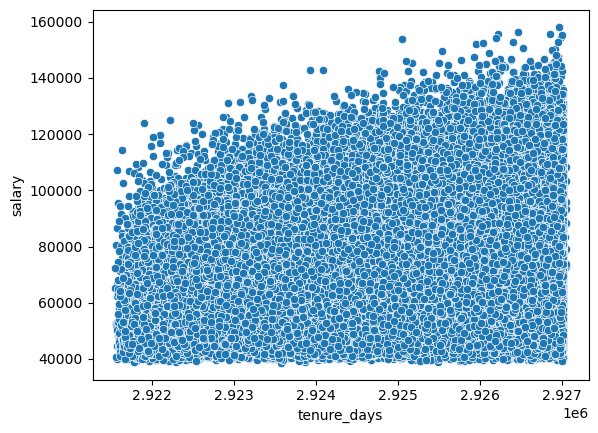

In [250]:
sns.scatterplot(data=sal_df, x='tenure_days', y='salary')

In [252]:
r, p = stats.pearsonr(sal_df.tenure_days, sal_df.salary)
r, p

(0.30646256131860095, 0.0)

In [254]:
if p<alpha:
    print('reject null')
    print('there is a weak linear relationship btwn tenure and salary')
else:
    print('accept null')

reject null
there is a weak linear relationship btwn tenure and salary


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [259]:
query = '''
select emp_no, count(title) as title_cnt
, datediff(max(to_date), hire_date) as tenure_days
from employees
	join titles
		using (emp_no)
group by emp_no
having max(to_date) > now()
'''

In [260]:
titles_df = pd.read_sql(query, url)

In [261]:
titles_df.head()

,emp_no,title_cnt,tenure_days
0,10001,1,2926512
1,10002,1,2926729
2,10003,1,2926449
3,10004,2,2926354
4,10005,2,2925338


In [262]:
titles_df.title_cnt.value_counts()

title_cnt
2    125345
1    111892
3      2887
Name: count, dtype: int64

<Axes: xlabel='tenure_days', ylabel='title_cnt'>

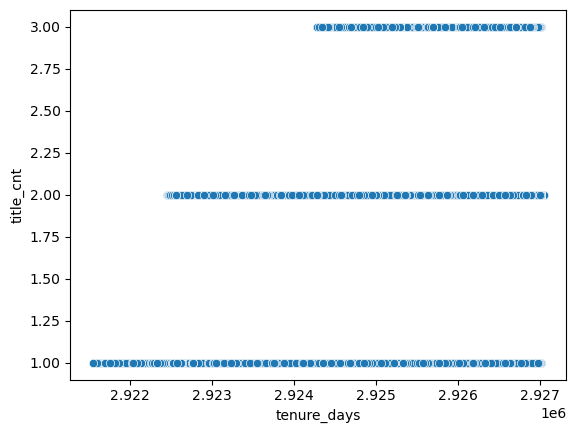

In [265]:
sns.scatterplot(data=titles_df, x='tenure_days', y='title_cnt')


$H_o$: there is no linear relationship between number of titles and how long an employees has been there

$H_a$: there is linear relationship between number of titles and how long an employees has been there

alpha = 0.05



In [269]:
# spearman used for discrete continuous variables
stats.spearmanr(titles_df.tenure_days, titles_df.title_cnt)


SignificanceResult(statistic=0.25489028077289544, pvalue=0.0)

In [271]:
if p < alpha:
    print('reject null')
    print('alternative hyp accepted: there is a relationship btwn title and tenure')
else:
    print('accept null')

reject null
alternative hyp accepted: there is a relationship btwn title and tenure


Use the sleepstudy data.

In [272]:
df = data('sleepstudy')

In [273]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [274]:
df.Days.value_counts()

Days
0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: count, dtype: int64

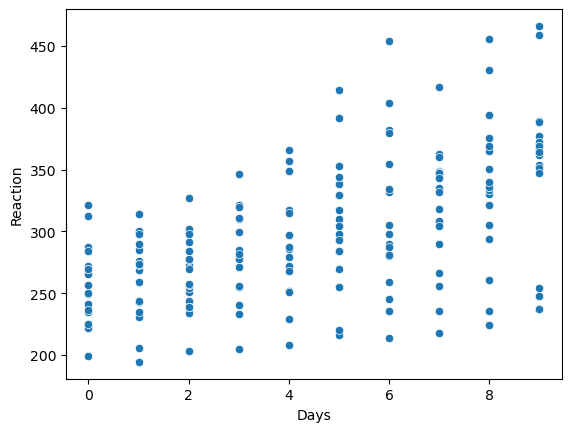

In [275]:
sns.scatterplot(data=df, x='Days', y='Reaction');

In [276]:
stats.spearmanr(df.Days, df.Reaction)

SignificanceResult(statistic=0.5228138502259547, pvalue=5.132878057706873e-14)

In [278]:
if p < alpha:
    print('reject null')
    print('alternative hyp accepted that there is a relationship btwn days and reaction time')
else:
    print('accept null')

reject null
alternative hyp accepted that there is a relationship btwn days and reaction time


TTest Exercises and stuff

Is there a difference in grades of students on the second floor compared to grades of all students?

one sample two tailed

Are adults who drink milk taller than adults who don't drink milk?

two sample one tailed

Is the price of gas higher in Texas or in New Mexico?

two sample one tailed

Are there differences in stress levels between students who take data science vs 
students who take web development vs students who take cloud academy?

Anova

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 
50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of 
significance.

$H_o$: there is no difference
$H_a$: there is a difference in average time it takes to sell a home

In [68]:
sample1=40
sample2=50
μ1=90
σ1=15
μ2=100
σ2=20
α=.05

In [69]:
t_stats, p = stats.ttest_ind_from_stats(μ1,σ1,sample1,μ2,σ2,sample2)

In [70]:
t_stats, p


(-2.6252287036468456, 0.01020985244923939)

In [71]:
if p < α:
    print('reject null')
else:
    print('accept null')

reject null


Load the mpg dataset and use it to answer the following questions:



Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


$H_o$: There is no difference in fuel efficency in 2008 & 1999 cars

$H_a$: There is a difference in fuel efficency of 2008 & 1999 cars

In [72]:
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [73]:
mpg_df.year.value_counts()

year
1999    117
2008    117
Name: count, dtype: int64

In [74]:
mpg_df['avg_mil'] = (mpg_df.cty + mpg_df.hwy)/2
mpg_df.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mil
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [75]:
avg_2008 = mpg_df[mpg_df.year == 2008].avg_mil
avg_1999 = mpg_df[mpg_df.year == 1999].avg_mil
avg_2008, avg_1999

(3      25.5
 4      25.5
 7      22.5
 10     24.0
 11     23.0
 14     21.0
 15     20.0
 17     21.0
 18     19.5
 19     17.0
 20     13.0
 21     17.0
 23     14.5
 26     21.0
 27     20.0
 28     19.5
 29     16.5
 30     12.5
 34     26.0
 36     23.5
 37     21.5
 42     20.5
 43     20.5
 44     14.0
 47     19.5
 48     19.5
 49     17.0
 50     16.0
 53     16.5
 54     16.5
 55     10.5
 59     15.0
 60     10.5
 61     15.0
 63     15.5
 65     14.0
 66     10.5
 67     15.0
 68     15.0
 69     14.0
 70     10.5
 73     15.0
 77     15.0
 81     16.0
 82     16.0
 88     15.0
 90     15.0
 93     21.5
 94     20.0
 97     19.0
 98     18.5
 99     17.0
 105    30.0
 106    30.5
 107    30.0
 108    25.0
 111    25.5
 112    26.0
 115    23.5
 118    24.0
 119    23.5
 120    20.5
 121    20.0
 122    20.5
 123    19.5
 124    17.0
 127    10.5
 128    16.5
 129    15.5
 130    12.5
 132    15.0
 133    15.0
 137    15.0
 139    16.0
 140    16.0
 144    27.0
 145    27.5

In [101]:
t_stat, p = stats.ttest_ind(avg_1999,avg_2008,equal_var=True)
t_stat, p

(0.21960177245940962, 0.8263744040323578)

In [102]:
if p < α:
    print('reject null')
    
else:
    print('fail to reject null')
    print('Out come is there is not a difference in fuel efficiency of 2008 & 1999 vehicles')

fail to reject null
Out come is there is not a difference in fuel efficiency of 2008 & 1999 vehicles


Are compact cars more fuel-efficient than the average car?


$H_o$: compact cars are not more fuel effecient than the average car

$H_a$: compact cars are more fuel efficent than the average car

In [103]:
mpg_df['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [104]:
mpg_df['avg_mil'].mean()

20.14957264957265

In [80]:
compact_avg = mpg_df[mpg_df['class'] == 'compact'].avg_mil

compact_avg.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mil, dtype: float64

In [ ]:
# stats.ttest_1samp?

In [85]:
t_stat, p = stats.ttest_1samp(compact_avg,mpg_df.avg_mil.mean())
t_stat, p

(7.896888573132533, 4.1985637943171486e-10)

In [99]:
if p < α:
    print('reject null')
    print('Outcome is that compact cars are more fuel effecient than the average car')
else: 
    print('accept null')

reject null
Outcome is that compact cars are more fuel effecient than the average car


Do manual cars get better gas mileage than automatic cars?

In [87]:
mpg_df['trans_type'] = np.where(mpg_df.trans.str.startswith('a'),'auto','manual')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mil,trans_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


$H_o$: Manual cars get the same or worse mileage than automatic cars

$H_a$: Manual cars get better mileage than automatic cars

In [90]:
# Make a basic test of the hypothesis
manual.mean() > auto.mean()

True

In [94]:
# Test the hypothesis
t_stat, p= stats.ttest_ind(manual,auto,alternative='greater')
t_stat, p

(4.593437735750014, 3.5771872005728424e-06)

In [97]:
if p < α:
    print('reject null')
    print('manual cars get better mileage than automatic cars')
else:
    print('accept null')

reject null
manual cars get better mileage than automatic cars
